## Welcome to IsoDAT2d! 

### To get started, let's load in the code dependencies:

In [3]:
import SimDAT2D.SimDAT2D_MDK as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D_MDK as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
from tifffile import imread
from SimDAT2D import masking
import pyFAI.azimuthalIntegrator as AI
from scipy.ndimage import shift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [71]:
# # to reload any iterative changes to the code, uncomment the following lines:
import importlib
sim = importlib.reload(sim)
iso = importlib.reload(iso)

### First step:

Generate 2d images of simulated thin film & substrate data

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Ni


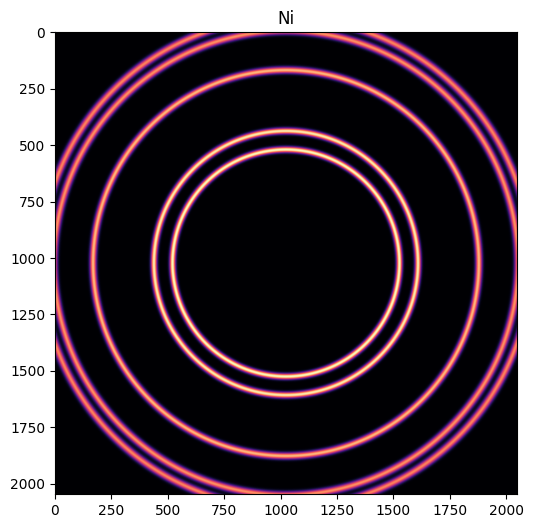

In [41]:
# 2d thin film: isotropic signal
# input parameters: distance & wavelength
thin_film = sim.create_isotropic(.4, .5e-10, cmap = 'magma')

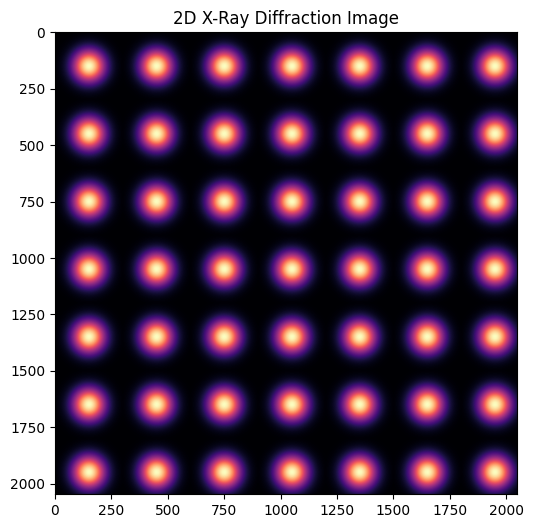

In [13]:
# 2d substrate: anisotropic signal
# input parameters: number of spots, width, offset, size, shape
substrate = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')

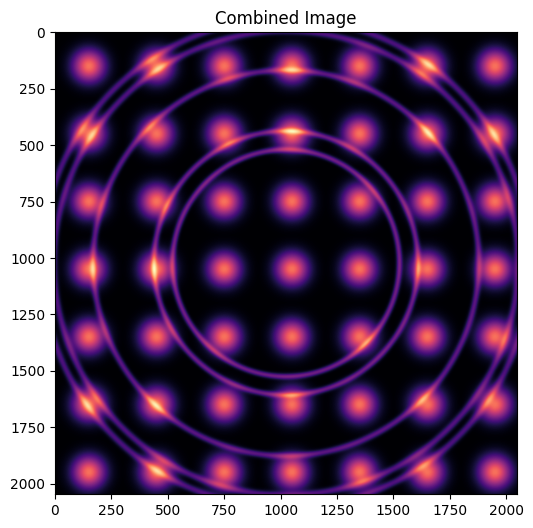

In [14]:
# combined (thin film on substrate)
film_on_substrate = sim.combine_image(thin_film, substrate*2, cmap= 'magma')
# *the factor of 2 helps reflect higher ratio of substrate signal

Additional capabilities of simulating data: 

* noise generation

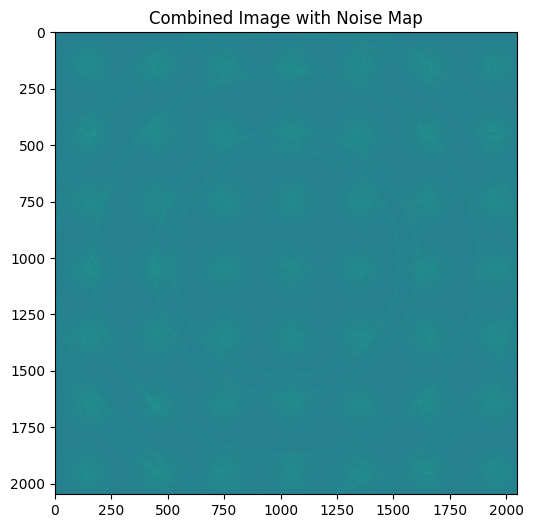

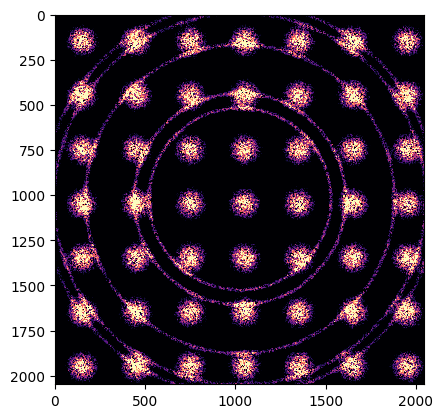

In [28]:
# adding noise
noisy = sim.generate_noisemap(film_on_substrate, intensity = 'med')
plt.imshow(noisy, vmin = 1, vmax = 4, cmap = 'magma')

In [15]:
# adding diffuse component(gaussian)


 #### Next, we generate a mask to put over the 2d image so only a slice is considered for each integration 

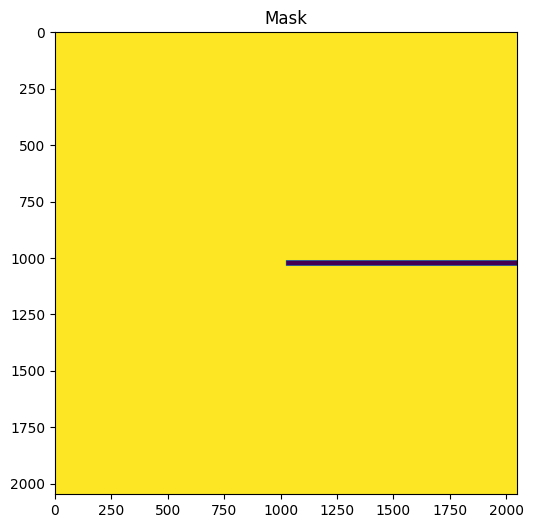

In [16]:
mask12 = sim.create_mask(thin_film, 12)

Here, only the width of the putple line will show data when integrating.

We also consider different geometries of masks:

# slice mask 

# mirrored geometry

### To integrate to 1d, we rotate either the mask or the image. 

This means that each slice gives a line integration that will add up to the whole

Before integration, to ensure equal q-range considered for each slice, we trim the data edges to a circle:

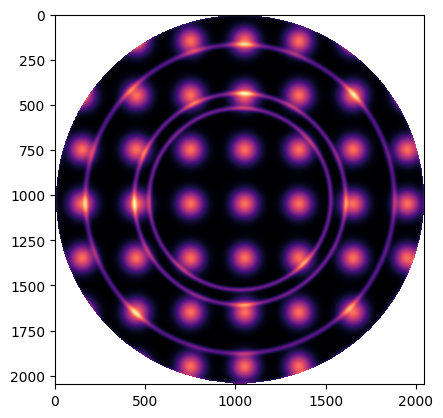

In [30]:
film_on_substrate_circle = sim.mask_circle_nan_edge(film_on_substrate)
plt.imshow(film_on_substrate_circle, cmap = 'magma')

Now integrating! We'll use the first mask with a rectangular slice

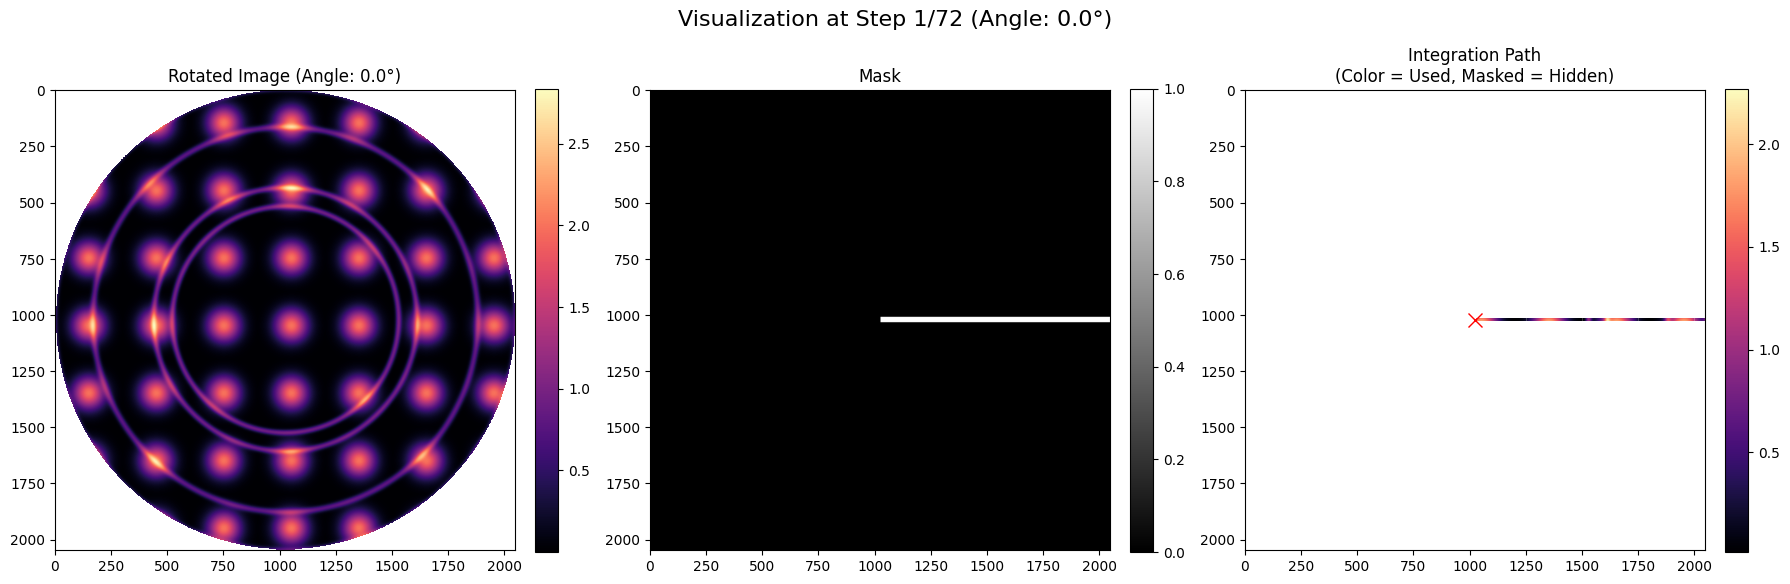

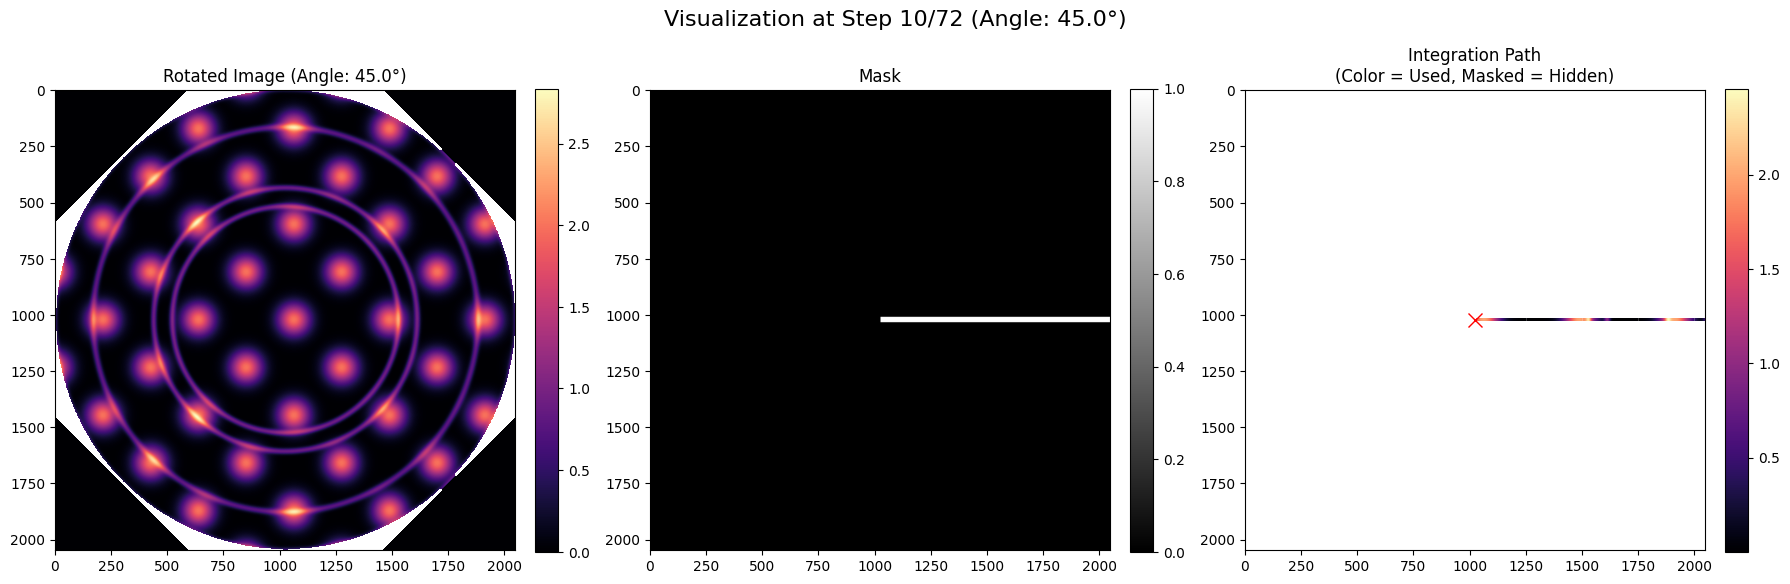

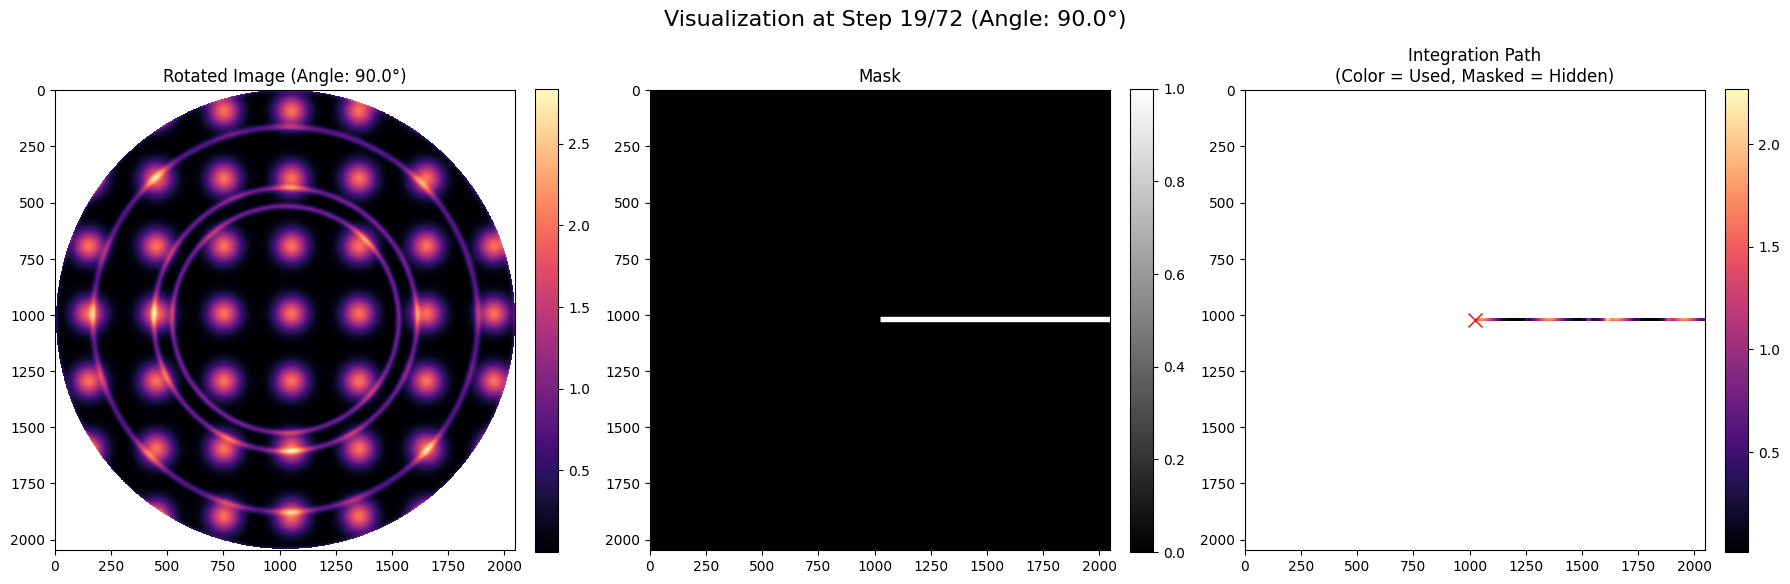

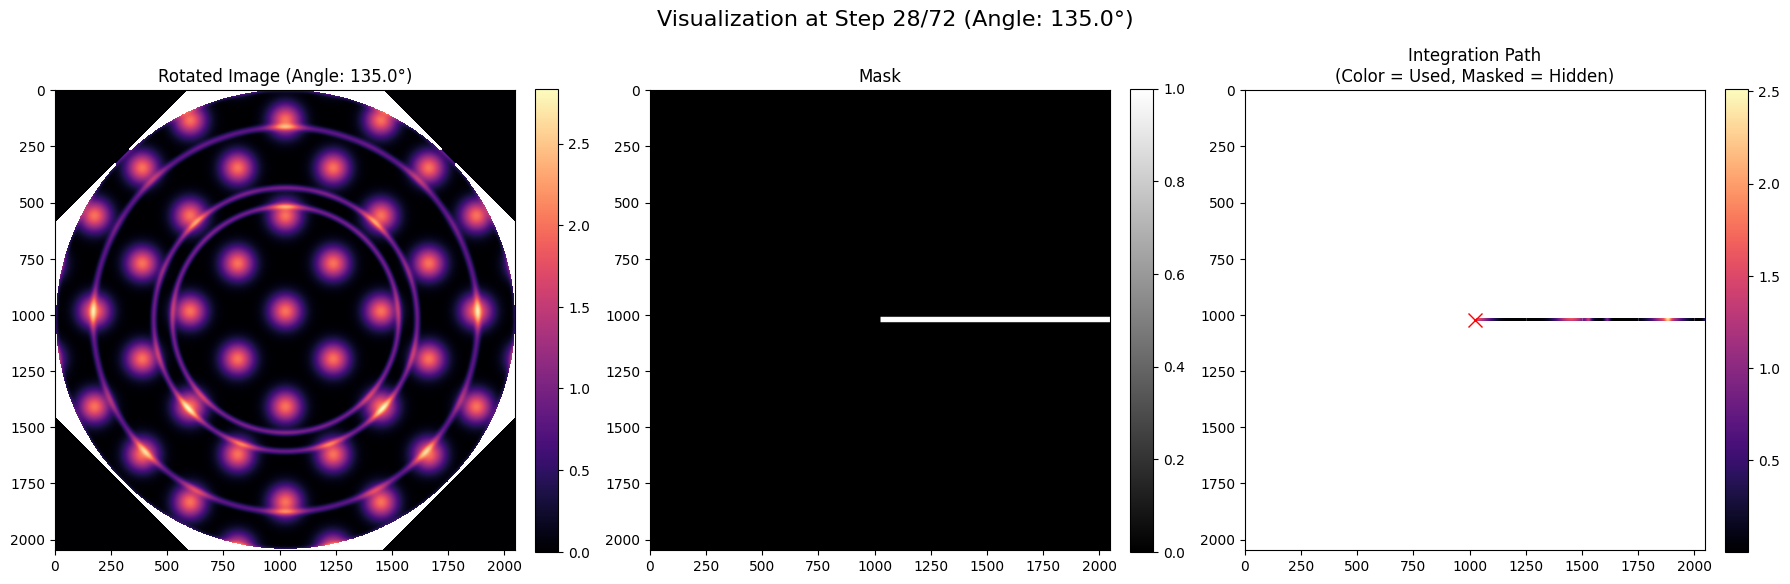

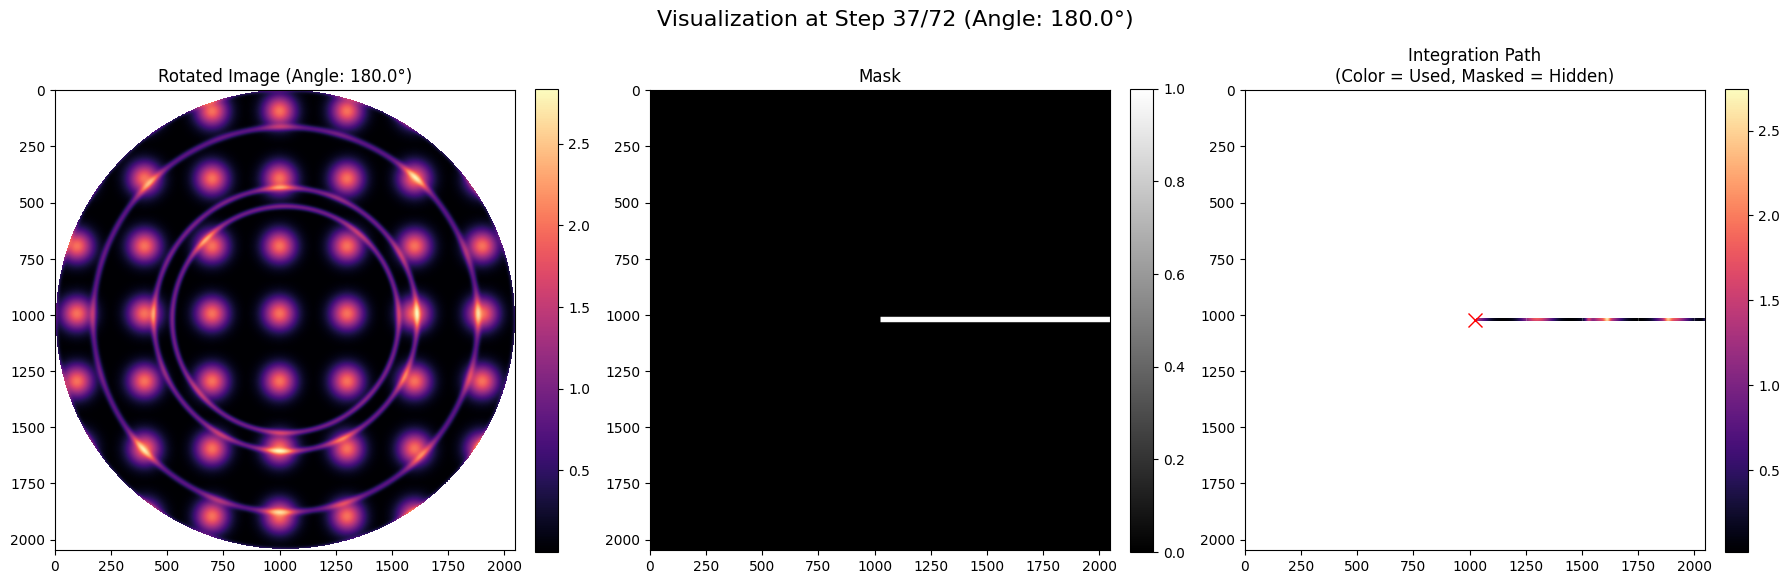

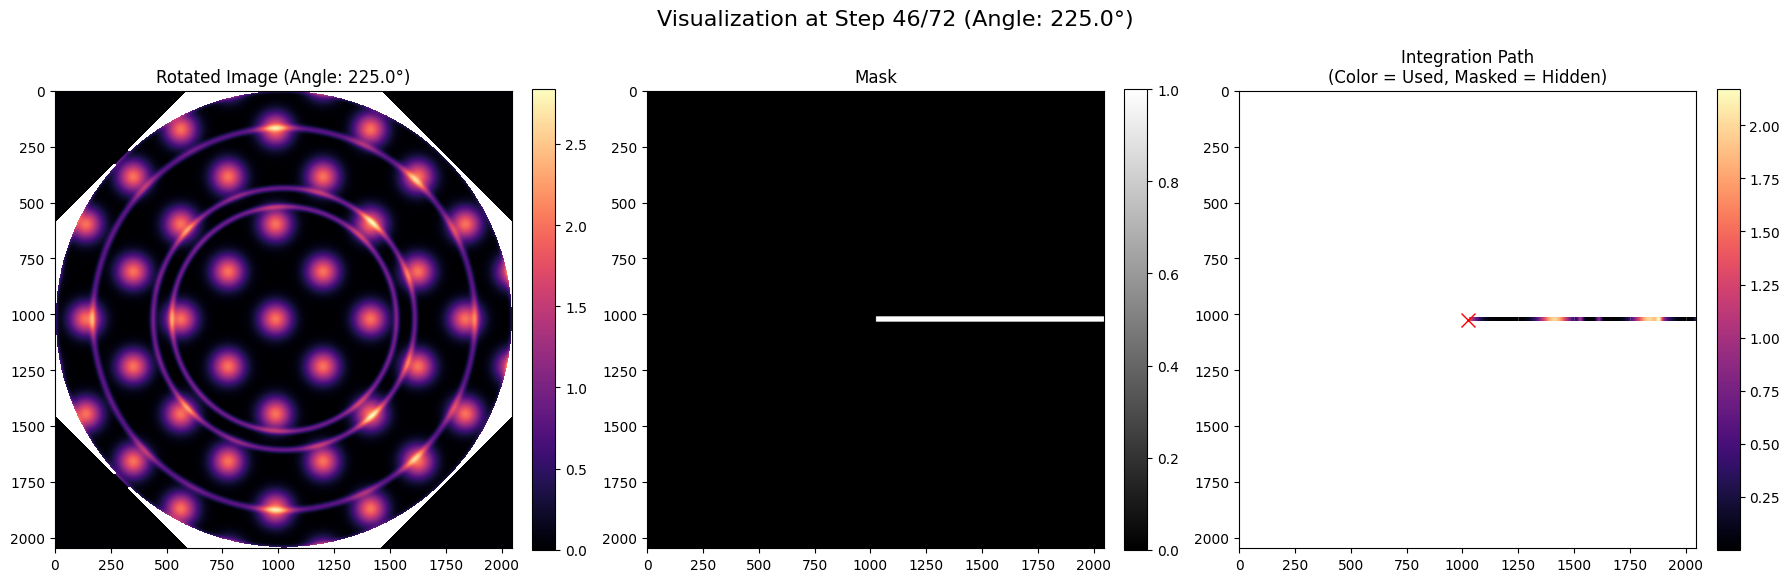

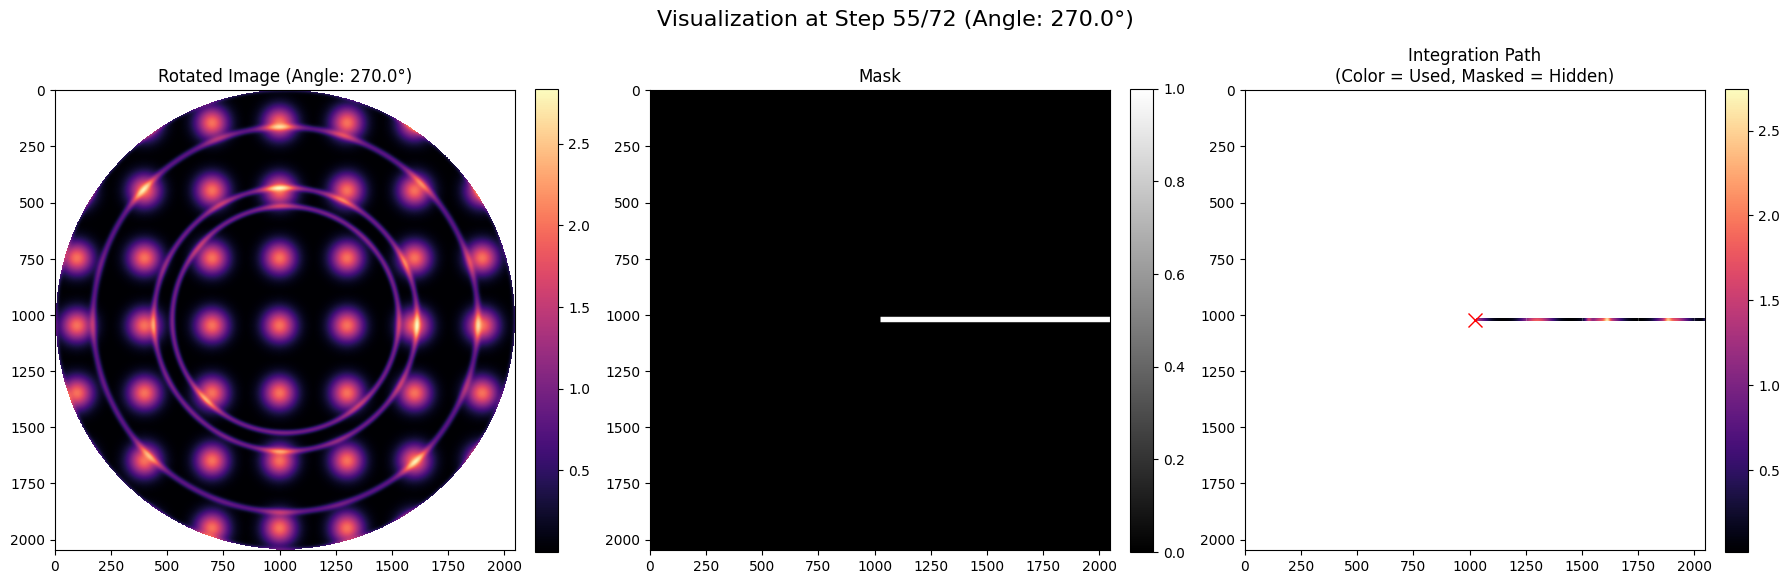

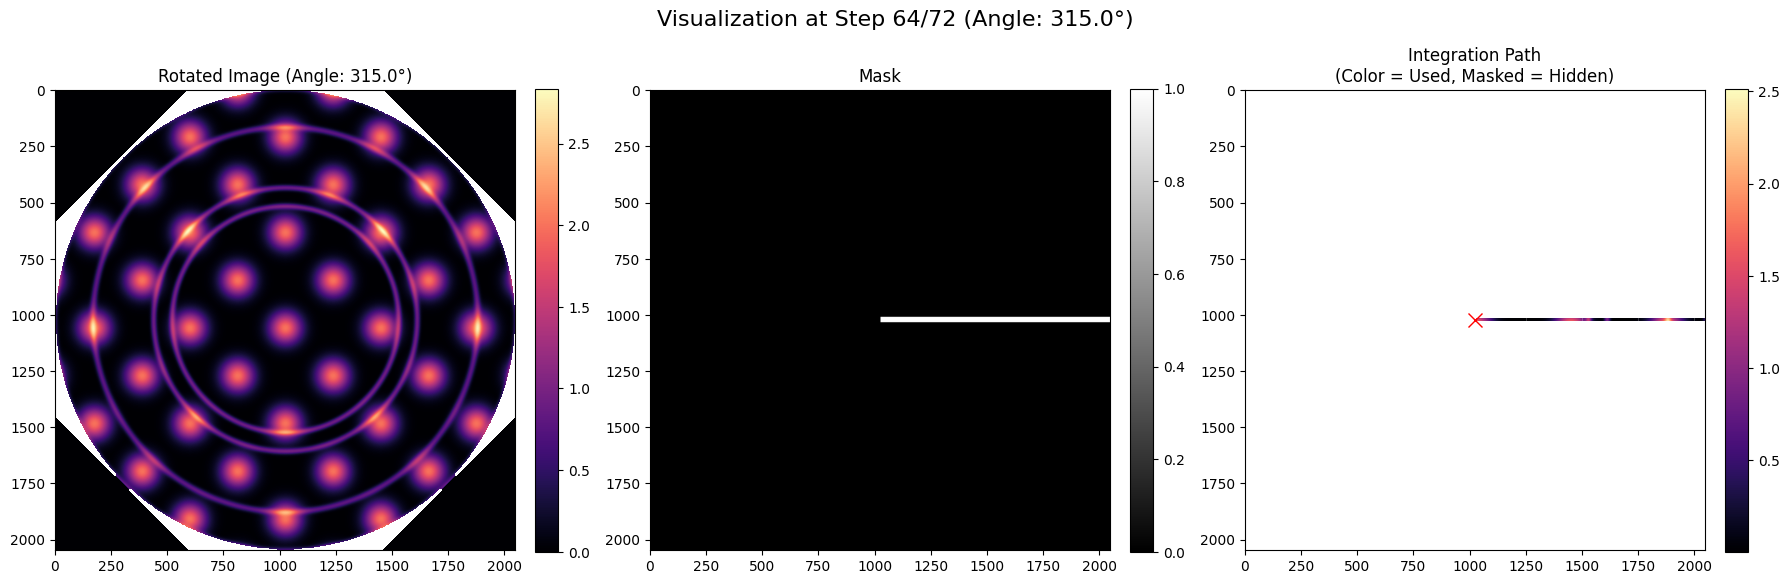

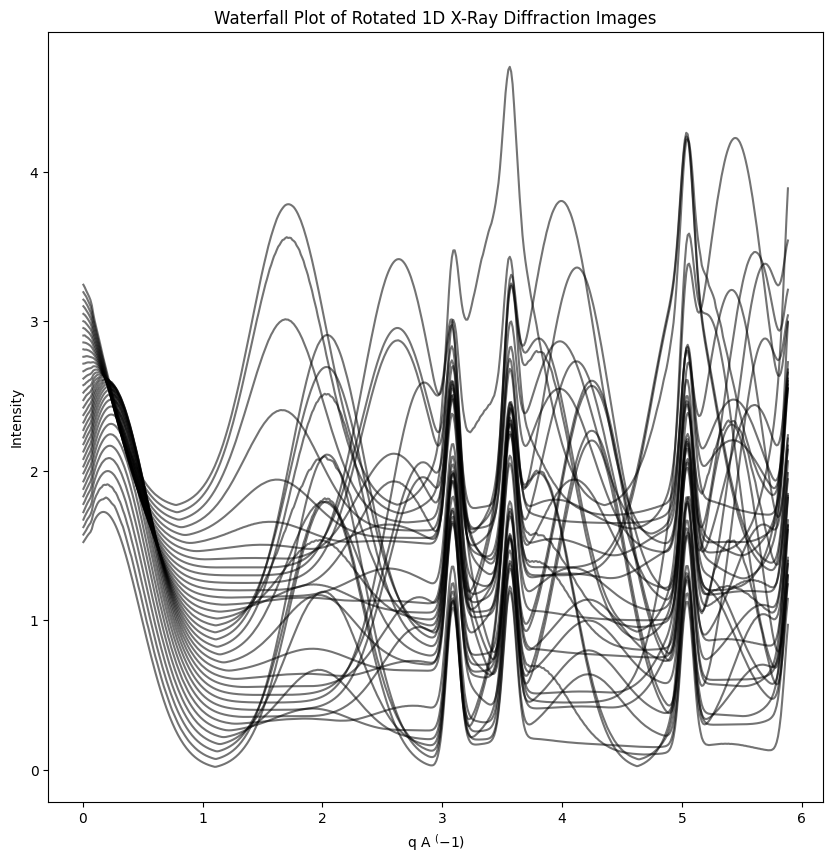

In [45]:
# input parameters: image, angle of rotation, distance, wavelength, resolution, mask
q, demo_data = sim.rotate_and_integrate_printout(film_on_substrate_circle, 5, .4, .5e-10, resolution = 500, mask = mask12, vis_interval = 9)

### Now, we move on to NMF (non-negative matrix factorization) and agglomerative clustering to separate the signals 

The beta-divergence is:  39.461437 %
 The final number of components used were 72 



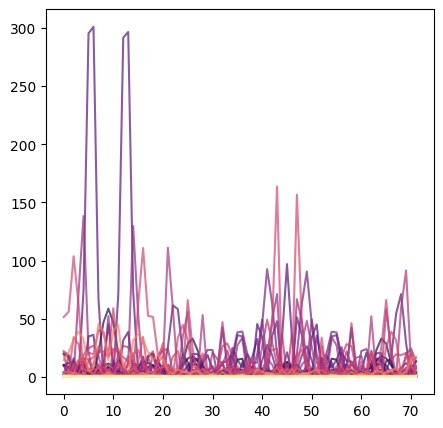

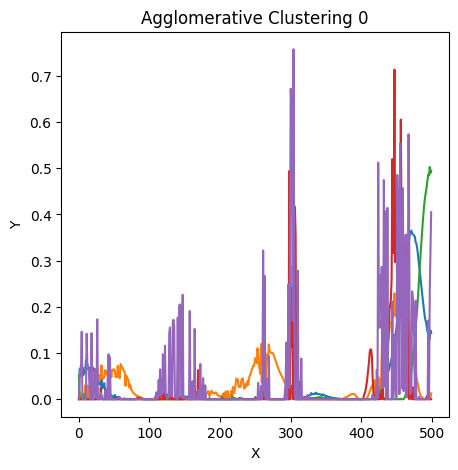

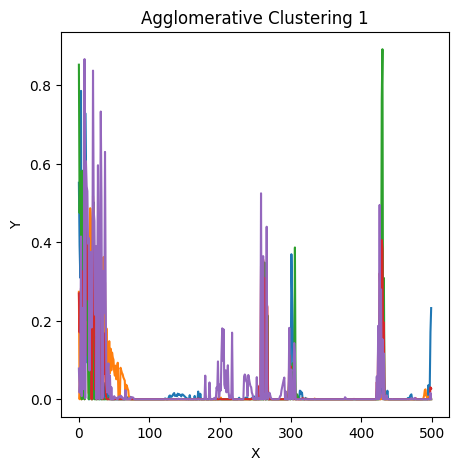

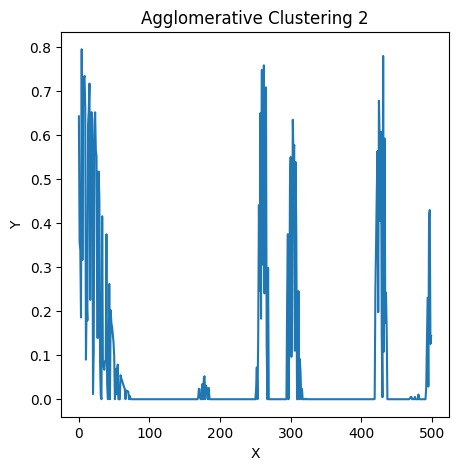

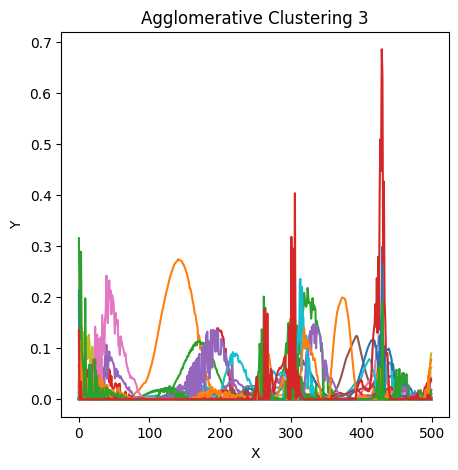

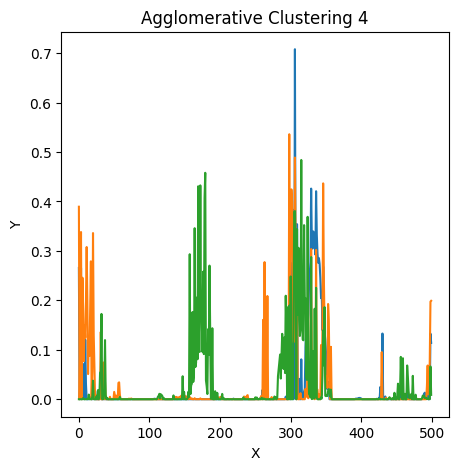

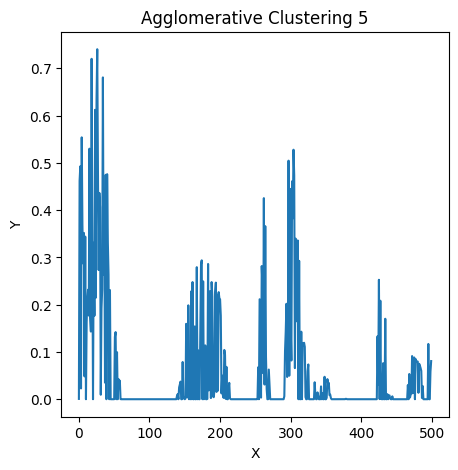

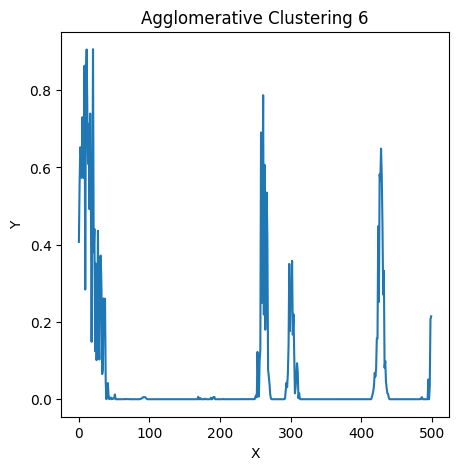

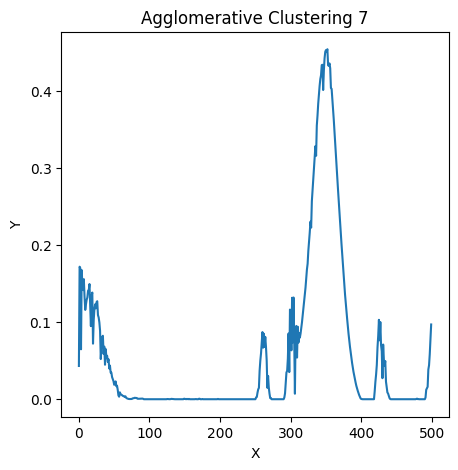

In [57]:
demo_components = iso.run_nmfac(demo_data, clusters = 8)

Reconstruction error: 0.182
Number of iterations: 149
(500, 70)


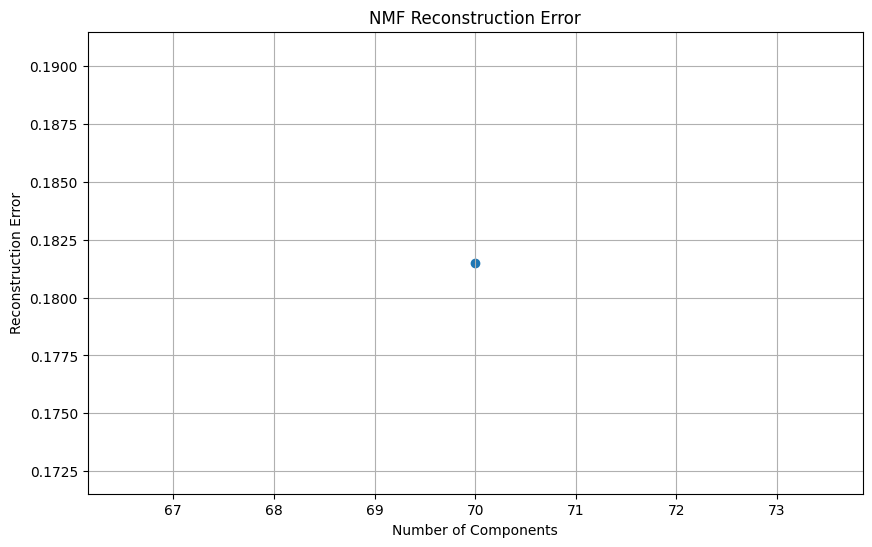

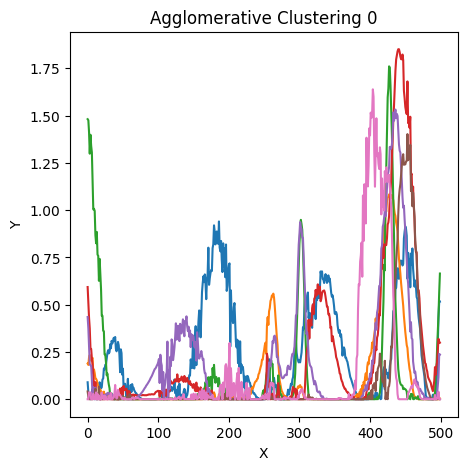

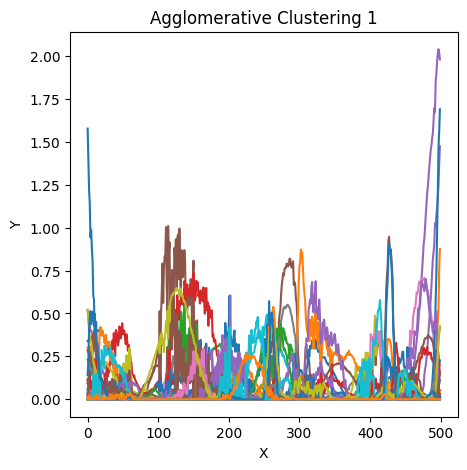

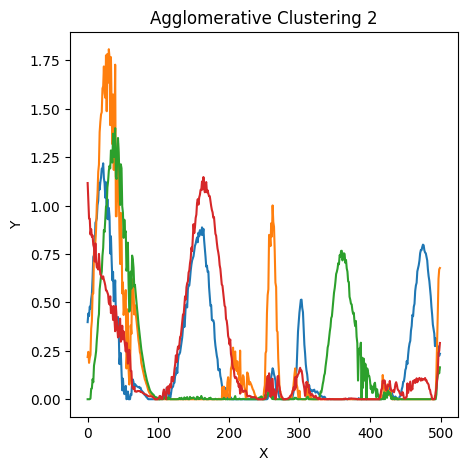

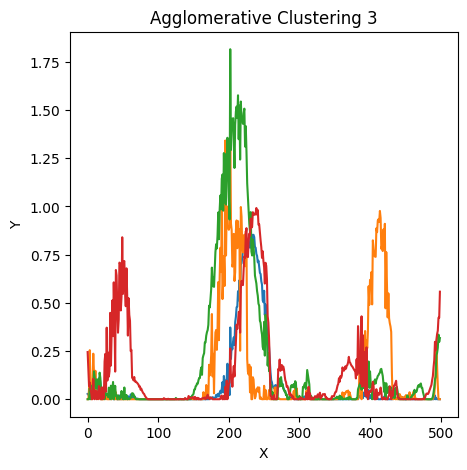

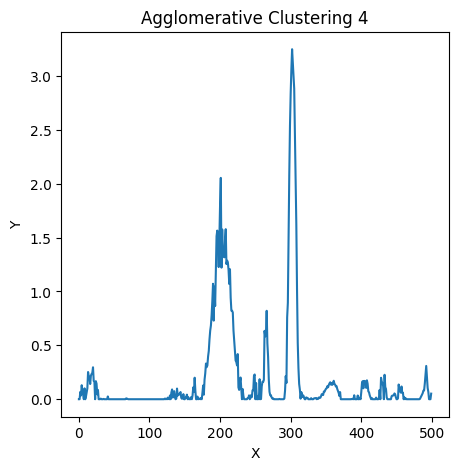

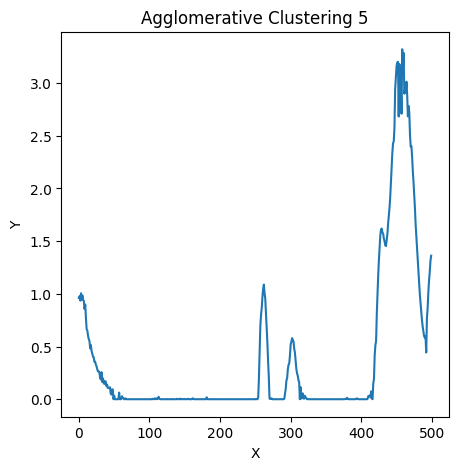

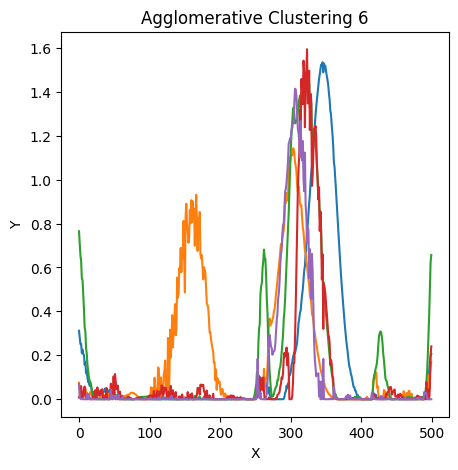

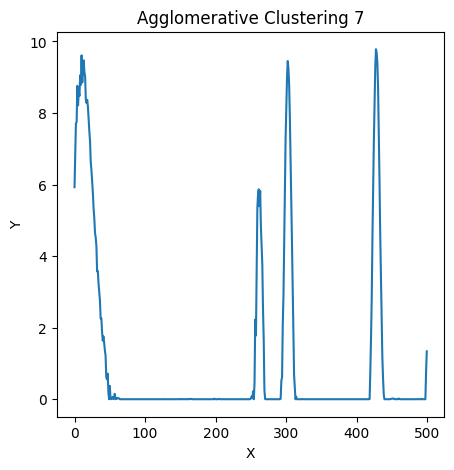

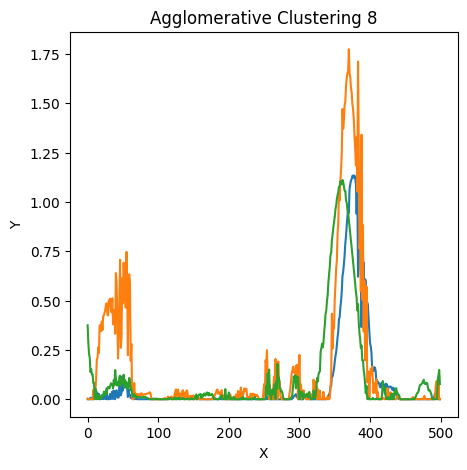

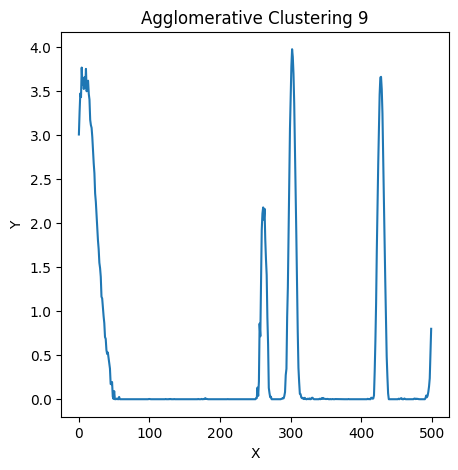

In [74]:
data_dict, iso_signal = iso.run_nmf_and_agg_cluster(demo_data, 70, 10)

Visualize the clusters:

In [75]:
cluster_groups2 = {}
for cluster_num in set(data_dict['Cluster_Number']):
    cluster_groups2[cluster_num] = []

# Group the data based on cluster numbers
for cluster_num, int_angle in zip(data_dict['Cluster_Number'], data_dict['Int_Angle']):
    cluster_groups2[cluster_num].append(int_angle)
    
np.save('demo.npy', cluster_groups2)

In [76]:
#loading in the previously saved data
dataset = np.load('demo.npy', allow_pickle=True)

#getting cluster 1 - 10
cluster1 = dataset.item().get(0)
cluster2 = dataset.item().get(1)
cluster3 = dataset.item().get(2)
cluster4 = dataset.item().get(3)
cluster5 = dataset.item().get(4)
cluster6 = dataset.item().get(5)
cluster7 = dataset.item().get(6)
cluster8 = dataset.item().get(7)
cluster9 = dataset.item().get(8)
cluster10 = dataset.item().get(9)

#creating a consistent q value for all clusters
q = np.linspace(0, 25, 3000)

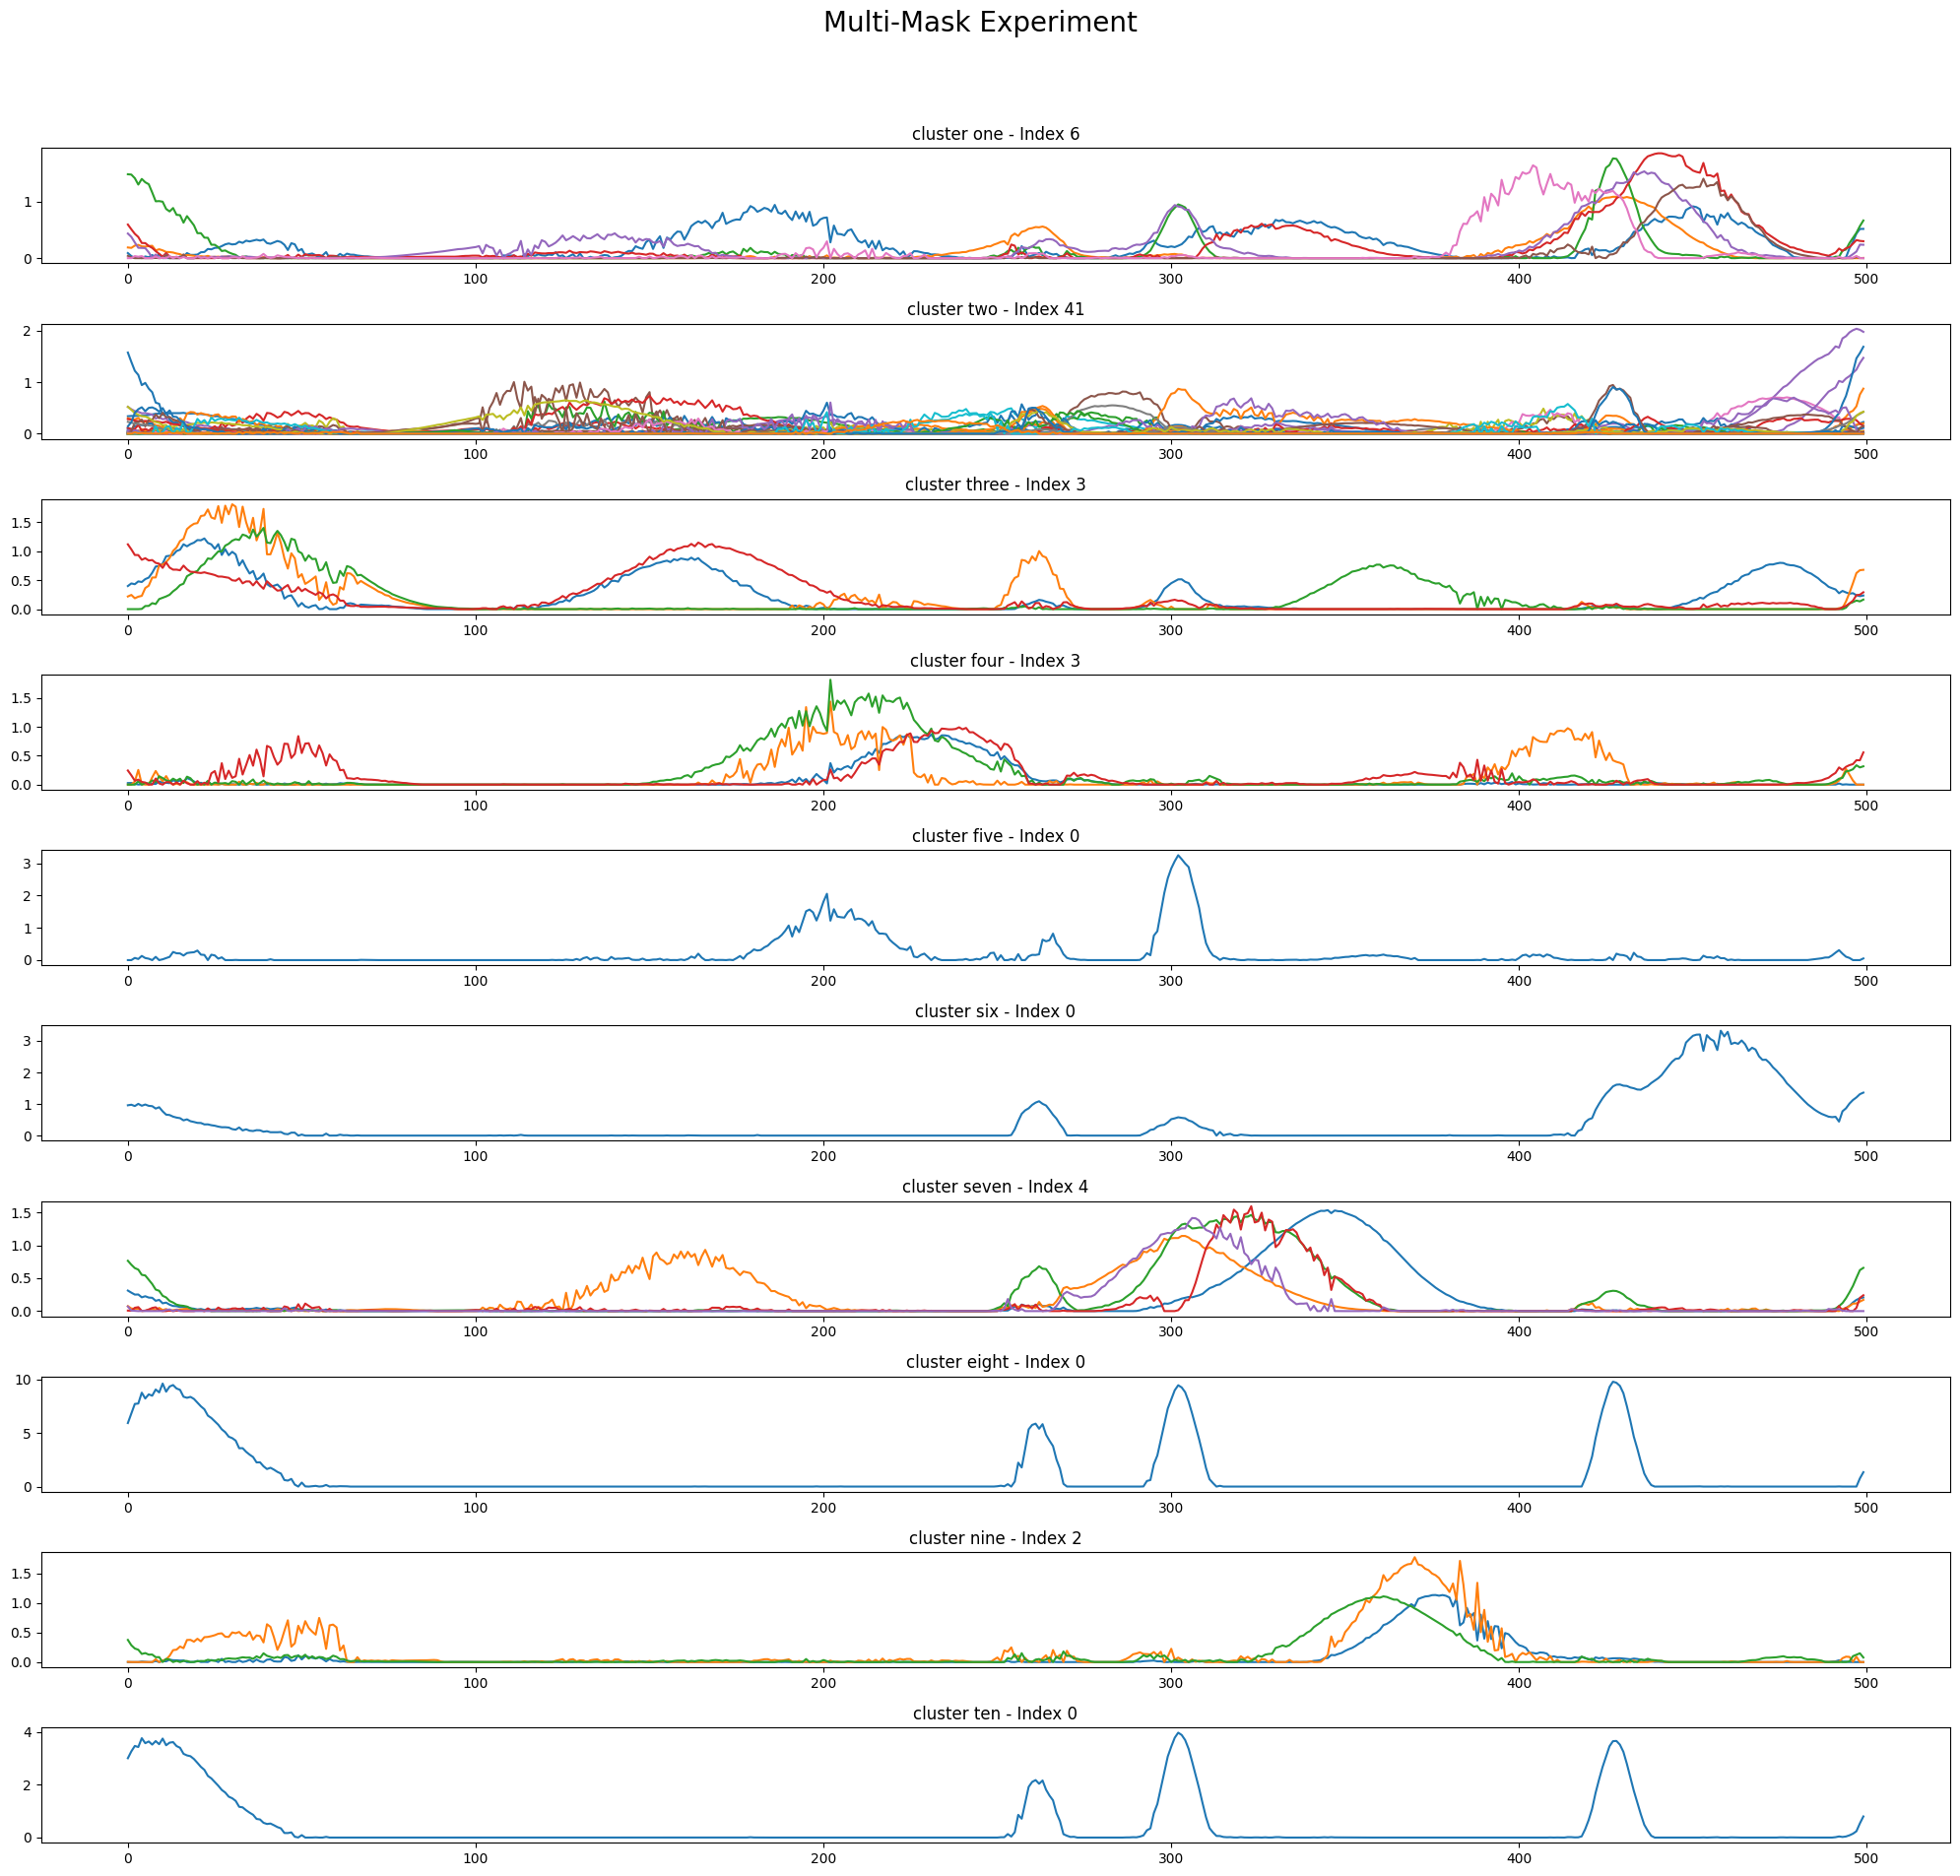

In [78]:
fig, axs = plt.subplots(10,1, figsize=(20, 20))
fig.suptitle('Multi-Mask Experiment', fontsize=20)

# Plotting cluster one
for i in range(len(cluster1)):
    axs[0].plot(cluster1[i])
    axs[0].set_title(f'cluster one - Index {i}')

# Plotting cluster two
for i in range(len(cluster2)):
    axs[1].plot(cluster2[i])
    axs[1].set_title(f'cluster two - Index {i}')
    
# Plotting cluster three
for i in range(len(cluster3)):
    axs[2].plot(cluster3[i])
    axs[2].set_title(f'cluster three - Index {i}')
    
# Plotting cluster four
for i in range(len(cluster4)):
    axs[3].plot(cluster4[i])
    axs[3].set_title(f'cluster four - Index {i}')
    
# Plotting cluster five
for i in range(len(cluster5)):
    axs[4].plot(cluster5[i])
    axs[4].set_title(f'cluster five - Index {i}')
    
# Plotting cluster six
for i in range(len(cluster6)):
    axs[5].plot(cluster6[i])
    axs[5].set_title(f'cluster six - Index {i}')
    
# Plotting cluster seven
for i in range(len(cluster7)):
    axs[6].plot(cluster7[i])
    axs[6].set_title(f'cluster seven - Index {i}')

# Plotting cluster eight
for i in range(len(cluster8)):
    axs[7].plot(cluster8[i])
    axs[7].set_title(f'cluster eight - Index {i}') 

# Plotting cluster nine
for i in range(len(cluster9)):
    axs[8].plot(cluster9[i])
    axs[8].set_title(f'cluster nine - Index {i}')

# Plotting cluster ten
for i in range(len(cluster10)):
    axs[9].plot(cluster10[i])
    axs[9].set_title(f'cluster ten - Index {i}')
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [79]:
avg_clust_list = [cluster10, cluster8]
averaged_clusters = np.array(iso.average_clusters(avg_clust_list))
smooth_clust = iso.smooth_averaged_cluster(averaged_clusters)

AttributeError: module 'IsoDAT2D.IsoDAT2D_MDK' has no attribute 'average_clusters'

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(q, averaged_clusters)
plt.plot(q, smooth_clust)

Let's compare the thin film-on-substrate to just the thin film:

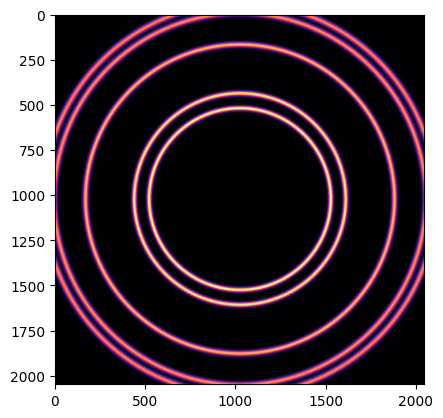

In [80]:
plt.imshow(thin_film, cmap = 'magma')

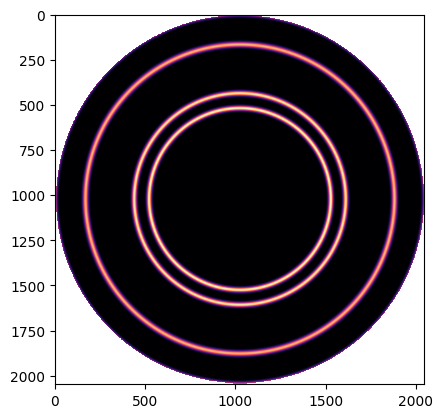

In [83]:
thin_film_circle = sim.mask_circle_nan_edge(thin_film)
plt.imshow(thin_film_circle, cmap = 'magma')

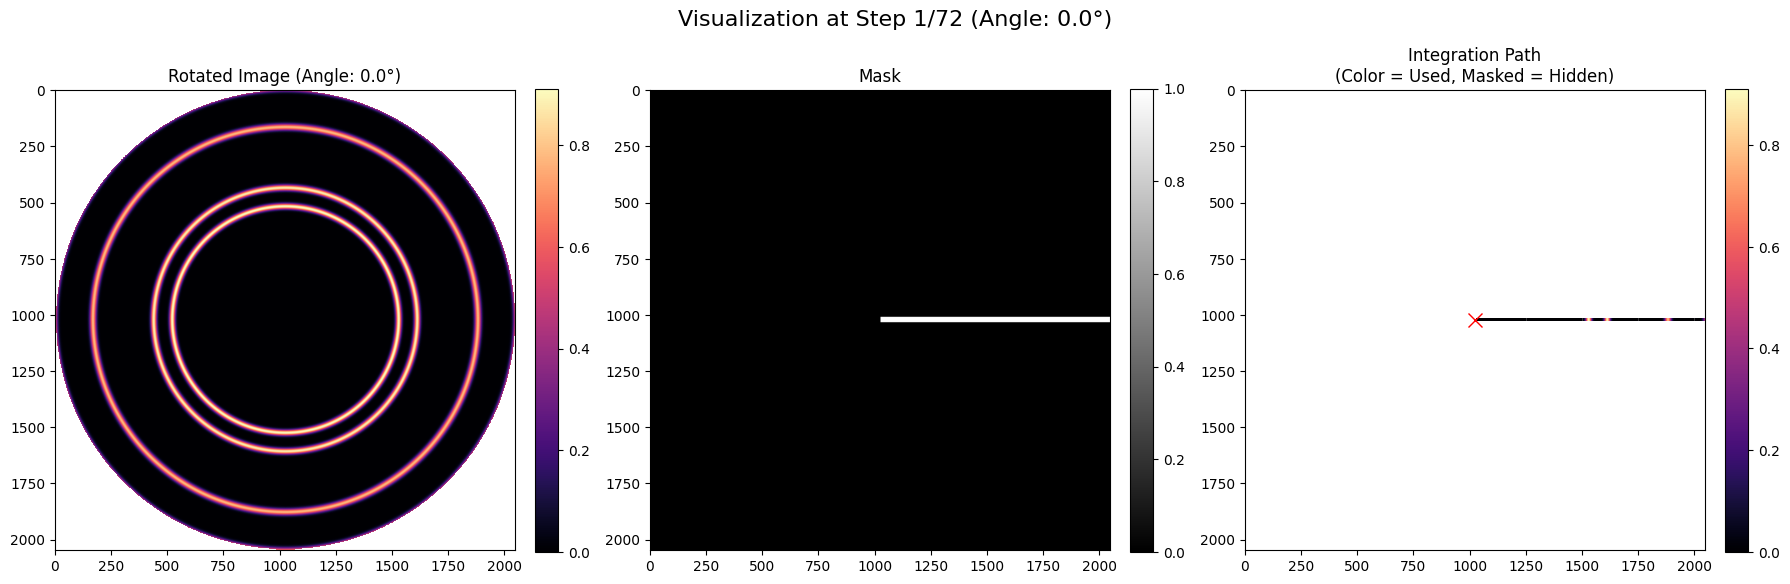

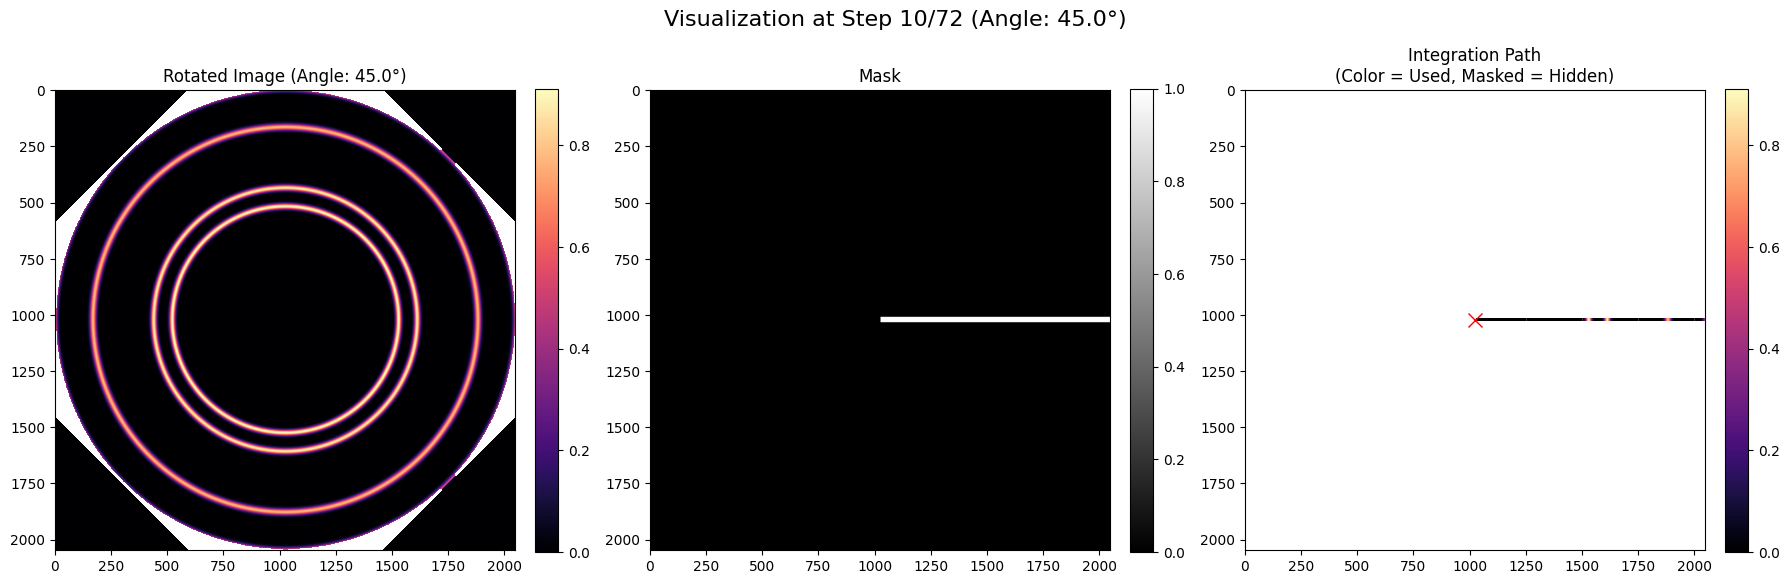

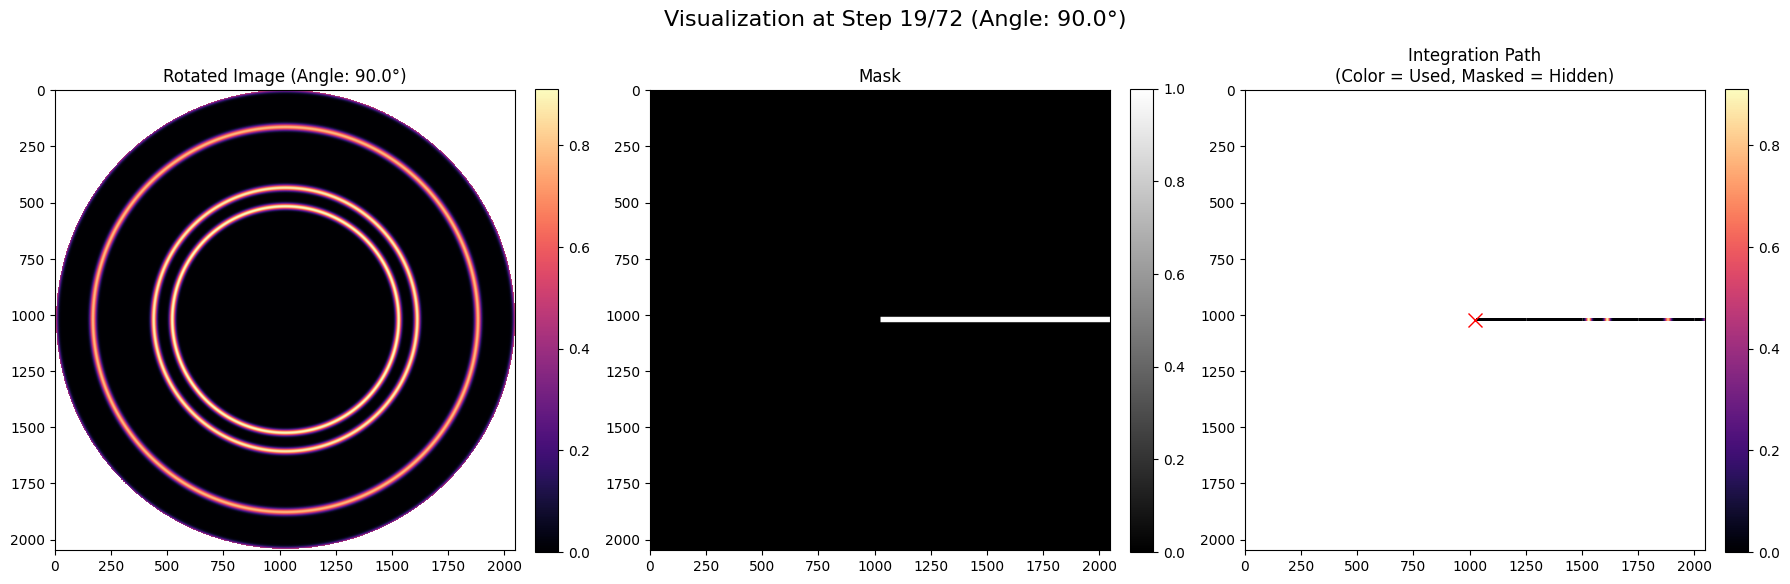

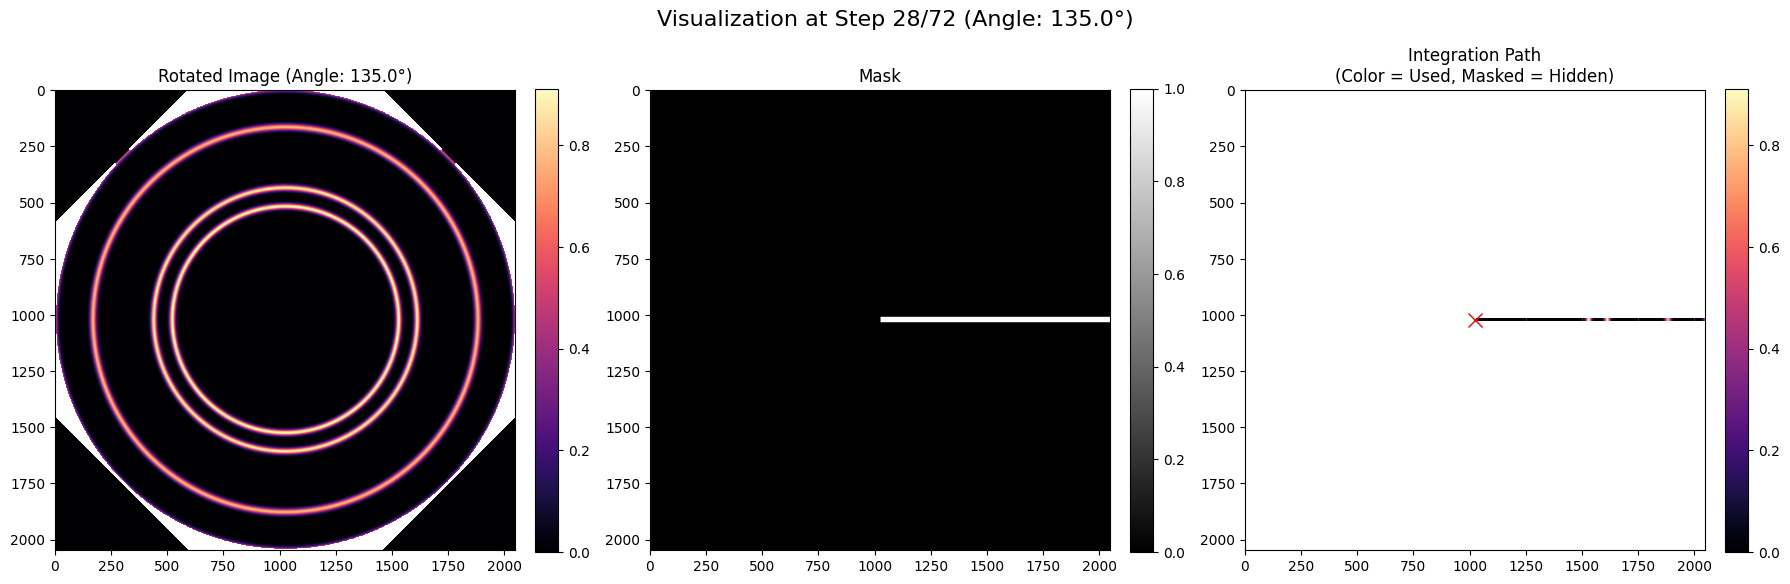

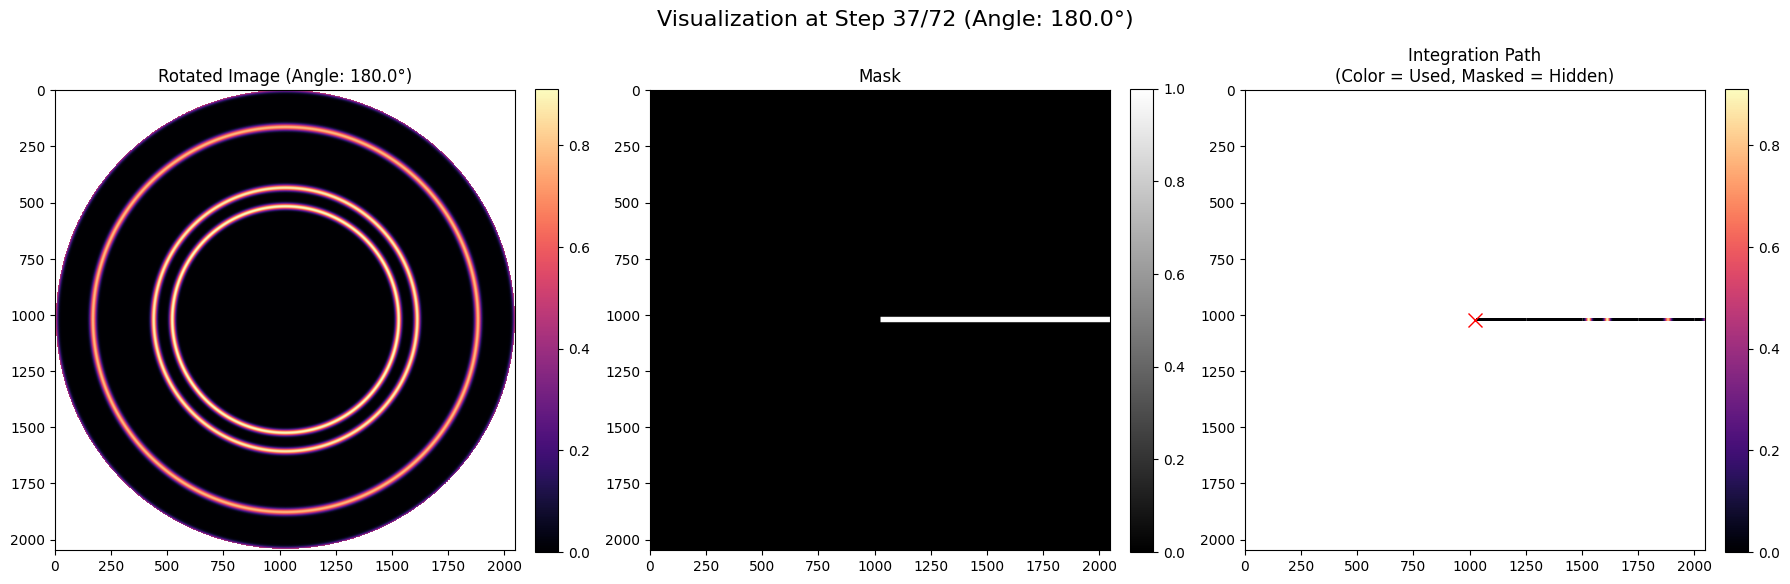

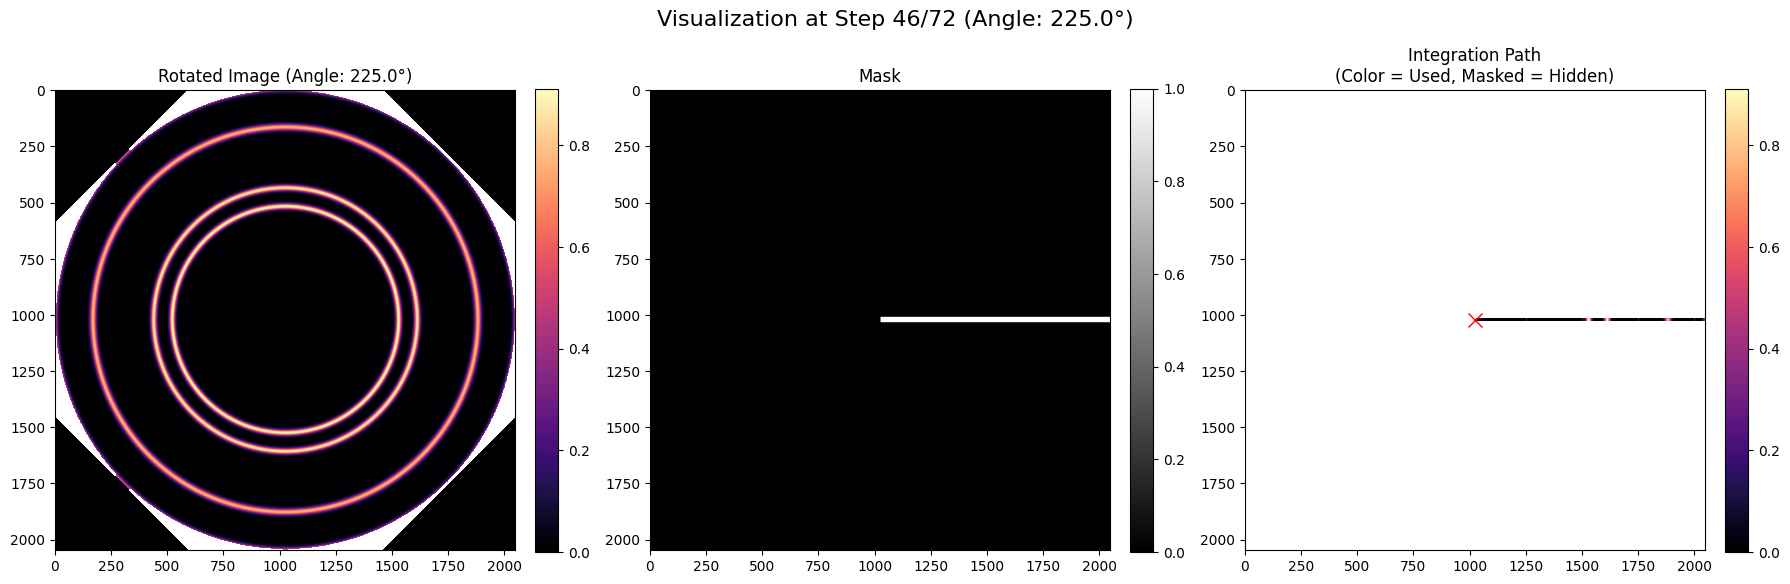

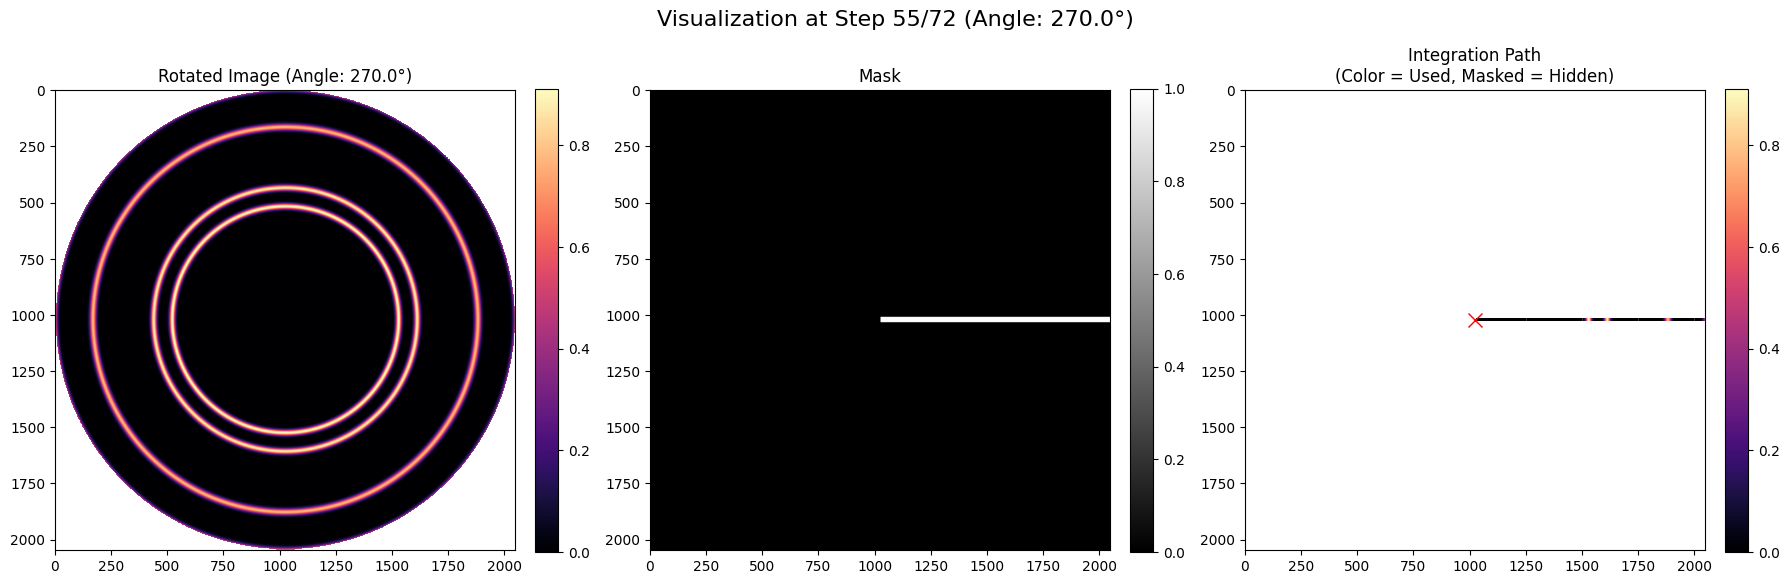

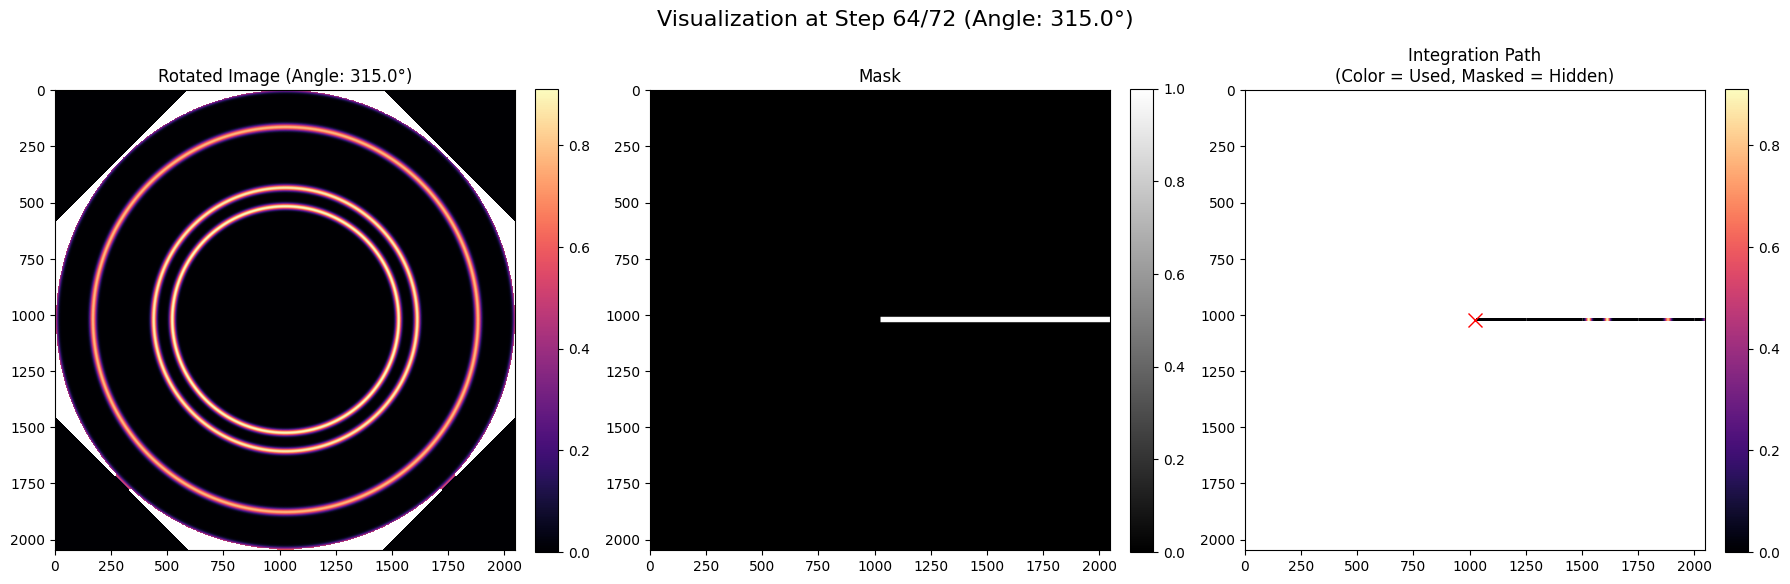

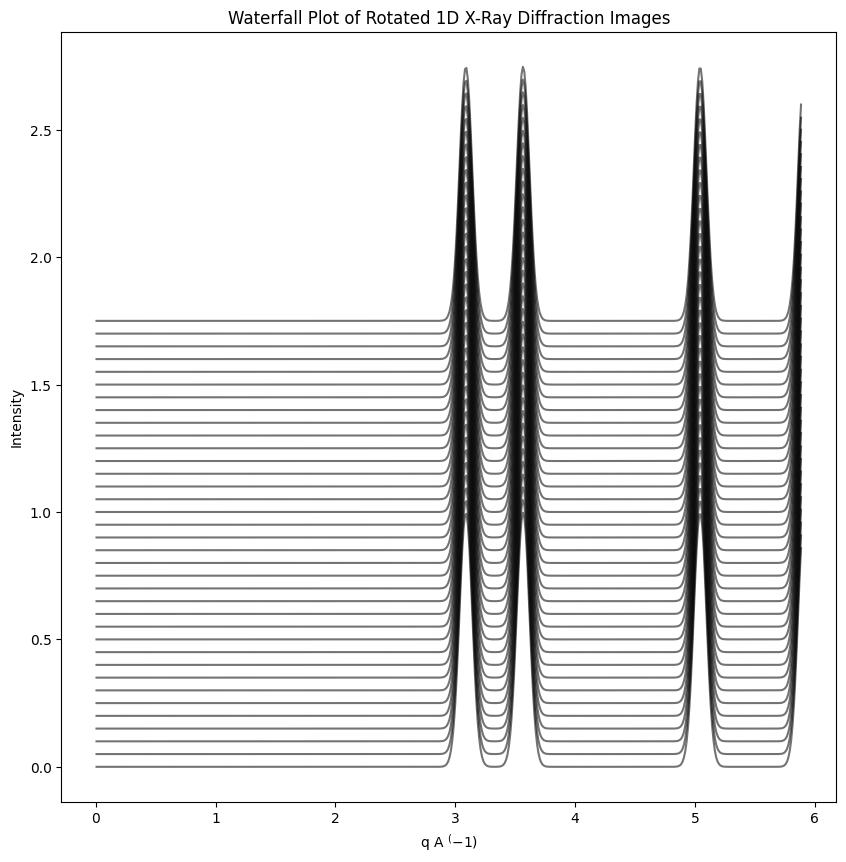

In [84]:
q, thinfilm_data = sim.rotate_and_integrate_printout(thin_film_circle, 5, .4, .5e-10, resolution = 500, mask = mask12, vis_interval = 9)

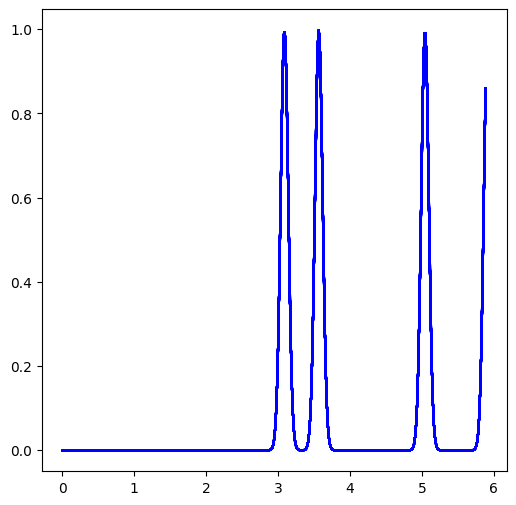

In [87]:
plt.figure(figsize = (6,6))
plt.plot(q, thinfilm_data, c= 'b', label = 'Isotropic')